# 92. Kümeleme Performansını Arttırmak

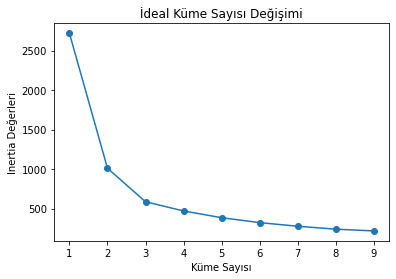

Yer   Canadian  Kama  Rosa
Küme                      
0            2    60    10
1            0     1    60
2           68     9     0


In [7]:
import numpy as np
data = np.loadtxt('seeds_dataset.txt')
wheat = data[:,:-1]#Verimizde son sütunu almıyoruz sadece ilk 7 sütunu alıyoruz
location = data[:,-1]

# Küme Sayısına Karar Vermek
from sklearn.cluster import KMeans
kume_sayisi = range(1,10)
inertias = []
for k in kume_sayisi:
    model = KMeans(n_clusters = k)
    model.fit(wheat)
    inertias.append(model.inertia_)
# Grafikleştirme
import matplotlib.pyplot as plt
plt.plot(kume_sayisi, inertias, '-o')
plt.title('İdeal Küme Sayısı Değişimi')
plt.xlabel('Küme Sayısı')
plt.ylabel('Inertia Değerleri')
plt.xticks(kume_sayisi)
plt.show()

# Çapraz Tablolar (Cross Tabs)
import pandas as pd
model = KMeans(n_clusters = 3)
labels = model.fit_predict(wheat)
df = pd.DataFrame({'Küme' : labels, 'Yer' : location})
df['Yer'] = df['Yer'].replace({1 : 'Kama', 2 : 'Rosa', 3 : 'Canadian'})
crosstab = pd.crosstab(df['Küme'], df['Yer'])
print(crosstab)

In [9]:
# Standart Scaler ile Kümeleme Performansını Arttırmak

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

scaler = StandardScaler()
kmeans = KMeans(n_clusters = 3)
pipeline = make_pipeline(scaler, kmeans)

pipeline.fit(wheat)
labels = pipeline.predict(wheat)

df = pd.DataFrame({'Küme': labels, 'Yer': location})
df['Yer'] = df['Yer'].replace({1 : 'Kama', 2 : 'Rosa', 3 : 'Canadian'})

crosstab = pd.crosstab(df['Küme'], df['Yer'])
print(crosstab)

Yer   Canadian  Kama  Rosa
Küme                      
0            4    62     5
1           66     6     0
2            0     2    65
